# **Matsa Sai Nityamani Sahith**

## **Packages for sentimental Analysis**

In [ ]:
import pandas as pd

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.4 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re,random,os
import seaborn as sns
from nltk.corpus import stopwords
import string
from pprint import pprint as pprint

# import spacy for basic processing
# optional: you may use nltk as well(lemmatisation etc.)
import spacy

# import gensim for LDA
# import preprocessing and coherence value
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# plotting tools
# import pyLDAvis
# import gensim
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# download spacy english cli
spacy.cli.download("en")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Loading Dataset (Tripadvisor Dataset)**

In [ ]:
# Loading the trip advisor hotel reviews data set.
df = pd.read_csv("tripadvisor_hotel_reviews.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Head of data, gives the first five rows of trip advisor hotel review data
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# Info of data to check for null values count and Datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Counting the total values for each rating with value_counts()
df['Rating'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


## **Data Preprocessing**

*The data preprocessing stage involves preparing the raw text for analysis by breaking it into structured and clean formats. Initially, tokenization is performed using the sent_to_words function to split sentences into individual words while converting text to lowercase and removing punctuations. Stopwords (common words like "the," "is") and punctuations are removed to retain only meaningful words, ensuring the dataset is concise and relevant. Lemmatization is applied to convert words to their base forms (e.g., "running" to "run") while retaining nouns, adjectives, verbs, and adverbs. This streamlined process helps in reducing noise and dimensionality, making the text ready for feature extraction and modeling*

### **Tokenize**

In [ ]:
# tokenize using gensims simple_preprocess
def sent_to_words(sentences, deacc=True):  # deacc=True removes punctuations
    # For each sentence, simple_preprocess does lowercase, Removing punctuation as deacc=True and Tokenize text to words
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))

# Convert to list
data=df['Review'].values.tolist()
data_words=list(sent_to_words(data))

#Printing a Sample
print(data_words[3])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['unique', 'great', 'stay', 'wonderful', 'time', 'hotel', 'monaco', 'location', 'excellent', 'short', 'stroll', 'main', 'downtown', 'shopping', 'area', 'pet', 'friendly', 'room', 'showed', 'no', 'signs', 'animal', 'hair', 'smells', 'monaco', 'suite', 'sleeping', 'area', 'big', 'striped', 'curtains', 'pulled', 'closed', 'nice', 'touch', 'felt', 'cosy', 'goldfish', 'named', 'brandi', 'enjoyed', 'did', 'partake', 'free', 'wine', 'coffee', 'tea', 'service', 'lobby', 'thought', 'great', 'feature', 'great', 'staff', 'friendly', 'free', 'wireless', 'internet', 'hotel', 'worked', 'suite', 'laptops', 'decor', 'lovely', 'eclectic', 'mix', 'pattens', 'color', 'palatte', 'animal', 'print', 'bathrobes', 'feel', 'like', 'rock', 'stars', 'nice', 'did', 'look', 'like', 'sterile', 'chain', 'hotel', 'hotel', 'personality', 'excellent', 'stay']


### **Stop Word Removal**

In [ ]:
# create a list of stop words
# string.punctuation (from the 'string' module) contains a list of punctuations
from nltk.corpus import stopwords
stop_words= stopwords.words('english') + list(string.punctuation)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# function for removing stopwords
# Returns all words which are not stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# calling remove_stopwords functions
# remove stop words
data_words_npstops = remove_stopwords(data_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Comparing sample for before stopwords removal and after stopword removal
print("Before Stopwords Removal: ", data_words[3])
print("After Stopwords Removal: ", data_words_npstops[3])

Before Stopwords Removal:  ['unique', 'great', 'stay', 'wonderful', 'time', 'hotel', 'monaco', 'location', 'excellent', 'short', 'stroll', 'main', 'downtown', 'shopping', 'area', 'pet', 'friendly', 'room', 'showed', 'no', 'signs', 'animal', 'hair', 'smells', 'monaco', 'suite', 'sleeping', 'area', 'big', 'striped', 'curtains', 'pulled', 'closed', 'nice', 'touch', 'felt', 'cosy', 'goldfish', 'named', 'brandi', 'enjoyed', 'did', 'partake', 'free', 'wine', 'coffee', 'tea', 'service', 'lobby', 'thought', 'great', 'feature', 'great', 'staff', 'friendly', 'free', 'wireless', 'internet', 'hotel', 'worked', 'suite', 'laptops', 'decor', 'lovely', 'eclectic', 'mix', 'pattens', 'color', 'palatte', 'animal', 'print', 'bathrobes', 'feel', 'like', 'rock', 'stars', 'nice', 'did', 'look', 'like', 'sterile', 'chain', 'hotel', 'hotel', 'personality', 'excellent', 'stay']
After Stopwords Removal:  ['unique', 'great', 'stay', 'wonderful', 'time', 'hotel', 'monaco', 'location', 'excellent', 'short', 'stroll

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Lemmetization**

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# function for lemmatization
def lemmatization(texts,allowed_postags=['NOUN','ADJ','VERB','ADV']):
    # Initializing an empty list to store lemmatized texts
    texts_out=[]
    for sent in texts:
        doc=nlp(' '.join(sent))
        # Performing lemmatization on each token and filtering by allowed POS tags
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nlp = spacy.load("en_core_web_sm",disable=['parser', 'ner'])
#nlp = spacy.blank("en")

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized=lemmatization(data_words_npstops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Comparing sample for before stopwords removal, after stopword removal and after Lemmetization
print("Before Stopwords Removal: ", data_words[3])
print("After Stopwords Removal: ", data_words_npstops[3])
print("After Lemmetization: ",data_lemmatized[3])

Before Stopwords Removal:  ['unique', 'great', 'stay', 'wonderful', 'time', 'hotel', 'monaco', 'location', 'excellent', 'short', 'stroll', 'main', 'downtown', 'shopping', 'area', 'pet', 'friendly', 'room', 'showed', 'no', 'signs', 'animal', 'hair', 'smells', 'monaco', 'suite', 'sleeping', 'area', 'big', 'striped', 'curtains', 'pulled', 'closed', 'nice', 'touch', 'felt', 'cosy', 'goldfish', 'named', 'brandi', 'enjoyed', 'did', 'partake', 'free', 'wine', 'coffee', 'tea', 'service', 'lobby', 'thought', 'great', 'feature', 'great', 'staff', 'friendly', 'free', 'wireless', 'internet', 'hotel', 'worked', 'suite', 'laptops', 'decor', 'lovely', 'eclectic', 'mix', 'pattens', 'color', 'palatte', 'animal', 'print', 'bathrobes', 'feel', 'like', 'rock', 'stars', 'nice', 'did', 'look', 'like', 'sterile', 'chain', 'hotel', 'hotel', 'personality', 'excellent', 'stay']
After Stopwords Removal:  ['unique', 'great', 'stay', 'wonderful', 'time', 'hotel', 'monaco', 'location', 'excellent', 'short', 'stroll

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(' '.join(data_words[1]), '\n')
print(' '.join(data_lemmatized[1]))

ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution send email trip guest survey did not follow email mail guess tell concerned guest the staff ranged indifferent not helpful asked desk good breakfast spots neighborhood hood told no hotels gee best breakfast spots seattle block away convenient hotel does not know exist arrived late night pm inside run bellman busy chating cell phone he

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Exploratory Data Analysis**

*In the Exploratory Data Analysis (EDA) section, we focus on visualizing and understanding patterns in our data. First, a new column processed_text was created to join tokenized words back into a cohesive string format for better readability. Then, sentiment labels were categorized into Positive, Neutral, and Negative classes using rating thresholds. Word frequency visualizations were plotted to display the top words associated with each sentiment, helping us understand key terms. Lastly, word clouds were generated for each sentiment to highlight the most frequent words visually. This analysis provides a deeper insight into the data's sentiment distribution and key textual patterns*

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating a new column 'processed_text' in the dataframe 'df'
# Joining the list of tokens back into a single string, separated by spaces
df['processed_text'] = [' '.join(tokens) for tokens in data_lemmatized]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Rating,processed_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,special charge diamond member decide chain sho...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience good hotel level positive...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel excelle...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go game downfall view bu...


### **Rating Caterorization**

*   Rating (1&2) = Negative
*   Rating (3) = Neutral
*   Rating (4&5) = Positive

In [ ]:
# Creating a new column 'Sentiment' in the dataframe 'df'
# Here we are categorizing the rating into Positive, Neutral and Negative Sentiment
df['Sentiment'] = np.select(
    condlist=[
        df['Rating'] >= 4,
        df['Rating'] == 3,
        df['Rating'] <= 2
    ],
    choicelist=['Positive', 'Neutral', 'Negative'],
    default='Neutral'
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating a new column 'Sentiment Label' in the dataframe 'df'
# Maping sentiment with 0,1 and 2.
sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
df["Sentiment_Label"] = df["Sentiment"].map(sentiment_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Rating,processed_text,Sentiment,Sentiment_Label
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Positive,2
1,ok nothing special charge diamond member hilto...,2,special charge diamond member decide chain sho...,Negative,0
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience good hotel level positive...,Neutral,1
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel excelle...,Positive,2
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go game downfall view bu...,Positive,2


### **Visualization of Top 10 Words for Sentiment**

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

import matplotlib.pyplot as plt
from collections import Counter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function for finding the top 10 words for each sentiment
def plot_word_frequencies_by_sentiment(data, sentiment_label, top_n=10):
    # Filtering the data to include only rows with the specified sentiment
    sentiment_data = data[data['Sentiment'] == sentiment_label]
    # Combining all processed text into a single string and split it into individual words
    all_words = " ".join(sentiment_data['processed_text']).split()
    # Counting the frequency of each word in the combined text
    word_counts = Counter(all_words)
    # Getting the most common words and their counts
    most_common_words = word_counts.most_common(top_n)
    # Unpacking the words and their counts
    words, counts = zip(*most_common_words)


    #Plotting the top 10 words, using skyblue color
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(f"Top {top_n} Words for Sentiment: {sentiment_label}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


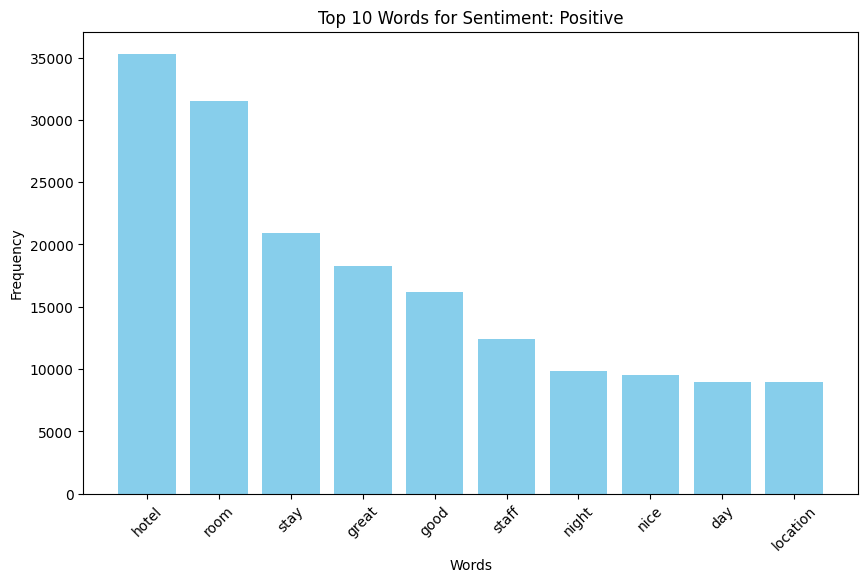

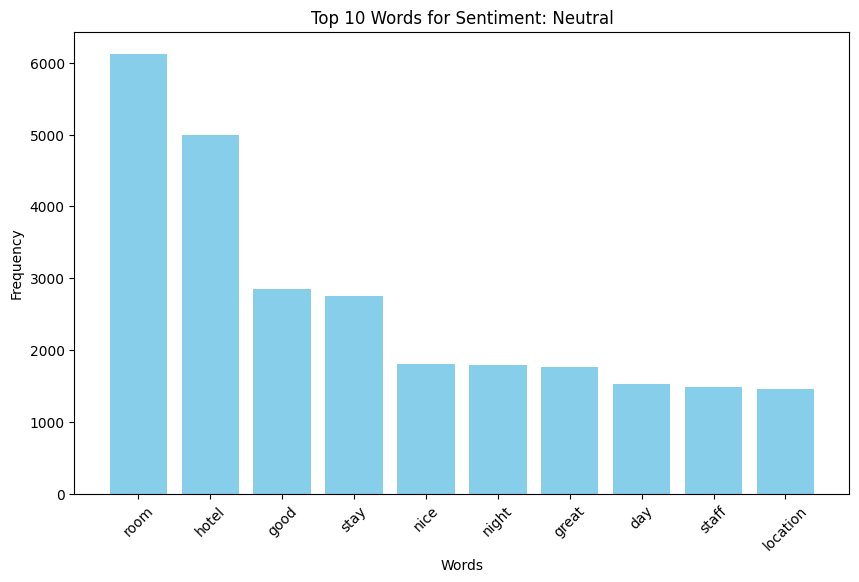

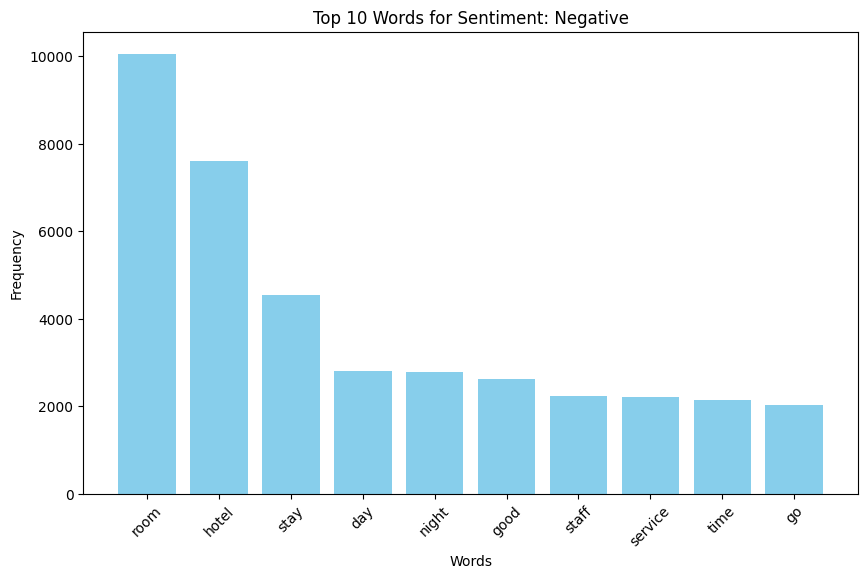

In [ ]:
# Plotting for Positive Sentiment
plot_word_frequencies_by_sentiment(df, 'Positive')

# Plotting for Neutral Sentiment
plot_word_frequencies_by_sentiment(df, 'Neutral')

# Plotting for Negative Sentiment
plot_word_frequencies_by_sentiment(df, 'Negative')

### **Visualization of Sentiment Class Distribution**

In [ ]:
import matplotlib.pyplot as plt
# Function to calculates how many times each sentiment (e.g., "Positive," "Neutral," "Negative") appears in the dataset
def plot_sentiment_distribution(data):
    sentiment_counts = data['Sentiment'].value_counts()
    # Plotting the distribution
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
    plt.title("Sentiment Class Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.xticks(rotation=0)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


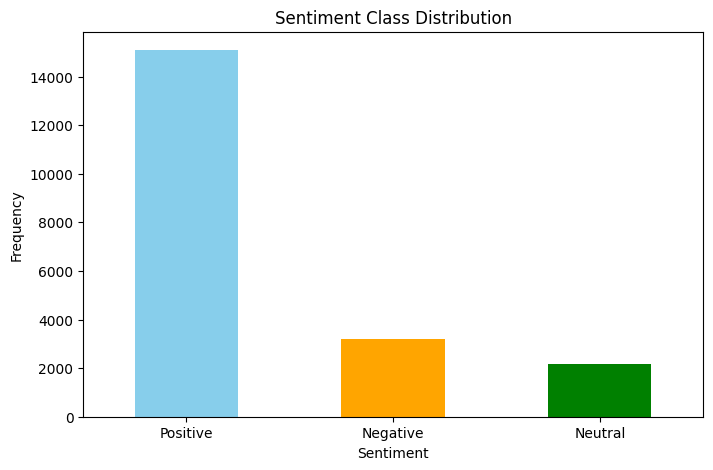

In [ ]:
# Plotting the distribution
plot_sentiment_distribution(df)

### **Visualization of Word Cloud for Sentiment: Positive, Neutral and Negative**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(data, sentiment_label):
    # Filtering the data to include only rows with the specified sentiment
    sentiment_data = data[data['Sentiment'] == sentiment_label]
    # Combining all processed text into a single string
    all_words = " ".join(sentiment_data['processed_text'])
    # Generating a word cloud from the combined text
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)
    # Displaying the word cloud for the specified sentiment
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Sentiment: {sentiment_label}")
    plt.axis('off')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


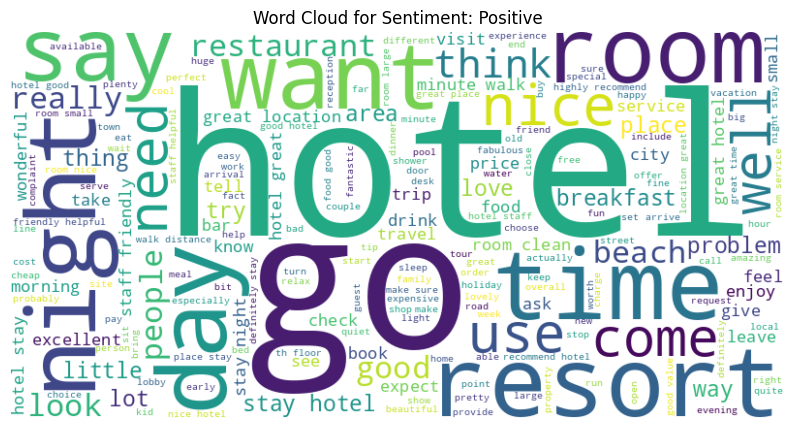

In [ ]:
# Plotting for Positive Sentiment
plot_word_cloud(df, 'Positive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


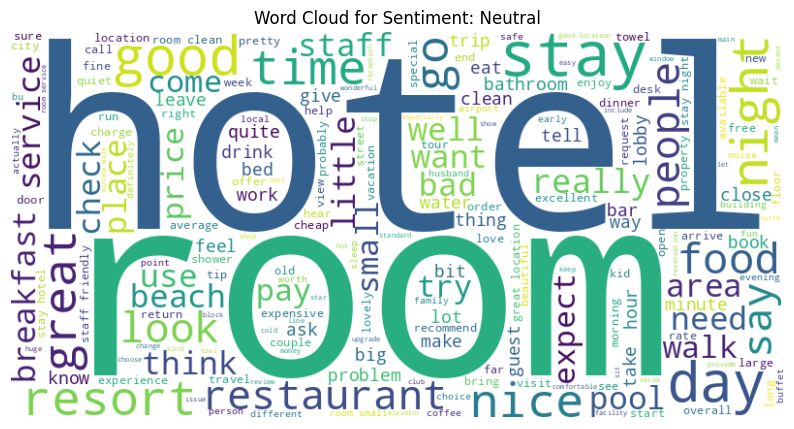

In [ ]:
# Plotting for Neutral Sentiment
plot_word_cloud(df, 'Neutral')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


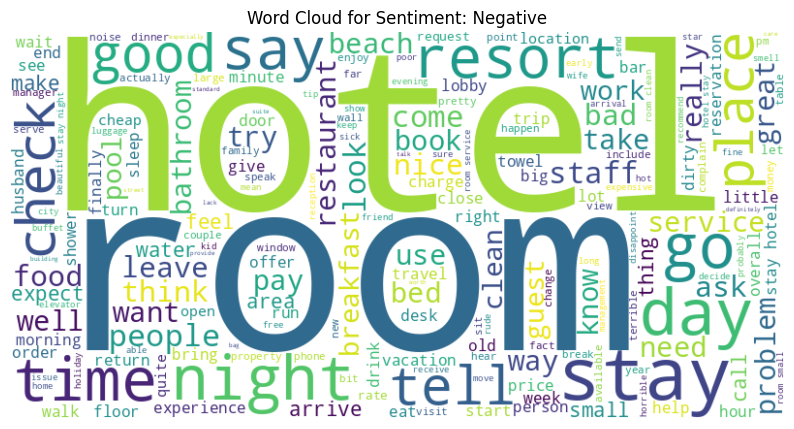

In [ ]:
# Plotting for Negative Sentiment
plot_word_cloud(df, 'Negative')

## **Model Development**

*In the Model Development phase, we focus on building a robust machine learning pipeline to classify sentiments. First, we split the data into training and testing sets (80-20 split) to evaluate performance consistently. We then apply TF-IDF vectorization with a vocabulary limit of 5000 terms, reducing noise and dimensionality. Next, a Logistic Regression model is trained on the transformed training data with 200 iterations for convergence. Predictions are made on the test set, and actual versus predicted labels are compared in a DataFrame to assess performance. Finally, metrics like accuracy, precision, recall, and F1-score are computed, along with a confusion matrix for detailed evaluation of class-wise performance.*

**Importing Packages**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Splitting Data**

In [ ]:
# Splitting data into training and testing sets
# Features: processed text
# Target: sentiment labels (0=Negative,1=Neutral,2=Positive)
# Training set 80%, Testing set 20%, Random state of 42 means: sampling the every 42nd row for test data
X = df['processed_text']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**TF-IDF Vectorization**

In [ ]:
# I set max_features=5000 to limit the vocabulary to the 5000 most frequent terms.
# This helps me reduce dimensionality, avoid overfitting on rare words, and make the model more efficient.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# I fit the vectorizer on the training data to learn the vocabulary and transform the text into TF-IDF features.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# I transform the test data using the same vectorizer to ensure consistency in feature representation.
X_test_tfidf = tfidf_vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Training the model**

In [ ]:
# Created a Logistic Regression model with a maximum of 200 iterations for convergence
# Random_state=42 to ensure consistent results across runs.
lr_model = LogisticRegression(max_iter=200, random_state=42)
# Trained the Logistic Regression model on the TF-IDF-transformed training data and labels.
lr_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(max_iter=200, random_state=42)

**Predicting**

In [ ]:
# Making predictions
y_pred = lr_model.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Checking Actual values with Predicted values**

In [ ]:
# Created a DataFrame(comparison_df) to compare the processed text, actual labels, and predicted labels.
# This helps me analyze the model's performance on the test data.
comparison_df = pd.DataFrame({
    'Processed_Text': X_test,
    'Actual_Label': y_test,
    'Predicted_Label': y_pred
}).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
comparison_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Processed_Text,Actual_Label,Predicted_Label
0,recommend hotel reviewer actually stay hotel g...,0,0
1,rock stay hotel jazz girlfriend night end hote...,2,2
2,hotel good location stay night way hotel servi...,1,2
3,great service nice pool beach lovely ground sm...,2,2
4,surprising treat spend weekend cartwright hote...,2,2


### **Confusion Matrix**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


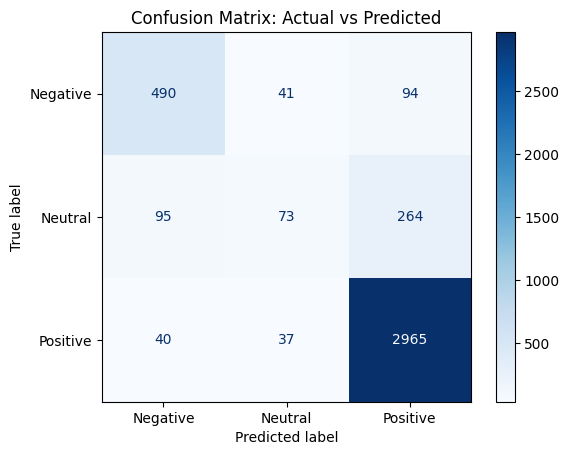

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(comparison_df['Actual_Label'], comparison_df['Predicted_Label'])

class_labels = ['Negative', 'Neutral', 'Positive']

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix: Actual vs Predicted")
plt.show()

### **Precision, Recall, F1-score, and Accuracy**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Computing the overall accuracy of the model by comparing actual and predicted labels.
accuracy = accuracy_score(comparison_df['Actual_Label'], comparison_df['Predicted_Label'])
print(f"Accuracy: {accuracy:.2f}")

# Generated a classification report to evaluate the model's performance,
# Which includes precision, recall, and F1-score for each sentiment class.
class_labels = ['Negative', 'Neutral', 'Positive']
report = classification_report(
    comparison_df['Actual_Label'],
    comparison_df['Predicted_Label'],
    target_names=class_labels
)
print("Classification Report:")
print(report)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78       625
     Neutral       0.48      0.17      0.25       432
    Positive       0.89      0.97      0.93      3042

    accuracy                           0.86      4099
   macro avg       0.72      0.64      0.66      4099
weighted avg       0.83      0.86      0.84      4099



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Error Analysis**

*In this section, we analyze misclassified examples to understand why the model struggled with certain predictions. Reviews with mixed sentiments or contradictory phrases often caused confusion, leading to overemphasis on either positive or negative terms. Lengthy reviews with neutral statements diluted strong sentiment cues, impacting accuracy. Neutral sentiments proved particularly challenging for the model due to their lack of strong polarity. This analysis highlights areas for improvement, such as incorporating contextual understanding or handling mixed sentiments more effectively*

In [ ]:
# Created a DataFrame containing only the misclassified examples.
# This filters the rows where the actual label does not match the predicted label.
misclassified_df = comparison_df[comparison_df['Actual_Label'] != comparison_df['Predicted_Label']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set pandas option to display full text
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
misclassified_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Processed_Text,Actual_Label,Predicted_Label
2,hotel good location stay night way hotel service room location great shopping restaurant probably stay opinion nice star hotel,1,2
29,nice place good freshly squeeze fruit juice morning good rest beech horrible lot sea weed dirty water constant noise motor party boat smell gasoline boat day daughter get sting sea lice second day spend day take cortisone steroid pill shot get wound clean doctor office care medical bill good vacation get spot look nd degree burn clear month resort management want responsibility beach federal property resort responsible happen hmmm accord brochure display flag jelly fish sting water milder reaction look good burn couple week food hard imagine effort make food inedible duck leg taste roadkill rabbit sour cream taste word taste taste eat understand cook make fresh fish taste toilet paper thing know cook bacon suggestion enjoy spend time pool pee kiddy get load place enjoy dirty beach know float water love inhale gasoline fume perfect place enjoy resort management hoot problem represent agency lot repeat booking place top think doubt resort well make sure bring small bill night stay get day want towel replace forget barman drink invisible fast important stay away fresh milk tap water feel free email com question try answert time permit slow writer take month sit write review,0,2
30,magnificent property mar terrible service physical aspect condado visually fresh aesthetically pleasing lobby room city view pool area curious fun experience door leak bit balconie nice pool fresh water salt water hot tub great shape tempt swim bar password room property unfortunately act actually stay resort task experience rundown stay elevator operate second hotel row see try cut electricity cost story property work elevator simply option tour desk absolute disaster book tour condado local chain tour day rain lady try reschedule confirm offer assure pm tour morning sure morning know line day schedule single tour make alternative arrangement gray line day return room swimming housekeeper entire floor sit room watch television come pm room stuff tell bother order heineken pool watch minute waitress chat bartender get leave casino dealer interested baseball game screen actually deal annoying note lot local trash gamble condado casino expect atmosphere guess big chain skim good staff condado settle second tier employee line low maintenance lay traveler resort probably fine good service important vacation experience sure explore option point sure book directly hotel website easy package expedia travelocity case fourth night free deal,1,0
46,clean frill holiday comfortable quiet hotel continental breakfast serve restaurant recommend hotel night stay,1,2
54,perfect location location location location walk distance major point interest room soundproof real effective th floor spacious clean room barcelona doubt book royal breakfast well absolutely start wake early ok range,1,2


### **Explaining Misclassified Text**

**Processed Text (Index 2)**

Actual Label: 1 (Neutral)

Predicted Label: 2 (Positive)

Reason for Failure:
The review contains phrases like "good location," "great shopping," and "nice star hotel," which lean toward positive sentiment.
The model likely overemphasized the positive terms, leading to misclassification.

**Processed Text (Index 29)**

Actual Label: 0 (Negative)

Predicted Label: 2 (Positive)

Reason for Failure:
This review includes severe complaints such as "horrible," "dirty water," and "food hard."
However, the review is lengthy and descriptive, with neutral statements like "medical bill" and "replace towel."
The model may have been overwhelmed by the length and failed to focus on the strong negative cues.

**Processed Text (Index 30)**

Actual Label: 1 (Neutral)

Predicted Label: 0 (Negative)

Reason for Failure:
The review mentions "terrible service" and "absolute disaster," which indicate dissatisfaction.
However, it also includes neutral or mildly positive statements such as "curious fun experience" and "probably fine good service."
The model likely overemphasized the negative phrases while ignoring the neutral and positive context, resulting in misclassification.

**Processed Text (Index 46)**

Actual Label: 1 (Neutral)

Predicted Label: 2 (Positive)

Reason for Failure:
The review uses positive terms like "clean," "comfortable," and "quiet," which are typically associated with Positive sentiment.
The model likely overemphasized the positive terms, leading to misclassification.

**Processed Text (Index 54)**

Actual Label: 1 (Neutral)

Predicted Label: 2 (Positive)

Reason for Failure:
The review contains terms like "perfect location" and "spacious clean room," which strongly suggest Positive sentiment.
However, there is no overly enthusiastic tone, keeping the sentiment neutral overall.
The model likely focused on the highly positive terms, ignoring the subtle neutrality.

## **Research and Reflection**

***Natural Language Processing for Sentiment Analysis: An Exploratory Analysis on Tweets***

The paper explores sentiment analysis on tweets using Natural Language Processing (NLP) techniques. Tweets, being short and informal, require specialized approaches different from traditional text sentiment analysis. The study emphasizes pre-processing to clean and normalize text for better machine interpretation, addressing challenges such as abbreviations, slang, and unstructured formats.

The proposed system comprises three main steps:
1. Subjectivity Classification: Distinguishing subjective tweets containing sentiment from objective ones.
2. Semantic Association: Associating sentiment lexicons to specific subjects within tweets using grammatical relationships.
3. Polarity Classification: Classifying sentiment polarity (positive, negative, or neutral) by evaluating associated sentiment lexicons using resources like SentiWordNet.

The system was tested using 1,513 manually labeled tweets about a Malaysian telecommunication service. Results were benchmarked against Alchemy API and machine learning algorithms (Naive Bayes, Decision Tree, and Support Vector Machine). The proposed system achieved higher accuracy (59.85%) than Alchemy API but was outperformed by Support Vector Machine with pre-processed tweets (64.95% accuracy).

Key findings indicate that pre-processing significantly improves sentiment classification performance, boosting accuracy, precision, and F-measure across tools. However, the system requires further refinement to handle the nuances of tweet-specific features like misspellings and comparative sentiments.

The study concludes with future directions to enhance system accuracy, particularly by improving pre-processing efficiency and incorporating larger datasets for training. This research underscores the importance of tailored NLP approaches for analyzing sentiment in informal, short-text domains like Twitter.



***Ethical Challenges***

Sentiment analysis models often inherit biases present in the training data, which can lead to unfair or inaccurate predictions. For example, datasets might over-represent certain demographics, cultural viewpoints, or language styles, skewing the model toward these patterns. This can result in disproportionate misclassifications.

To mitigate these challenges, strategies include:

*	Data Diversity: Ensure the training dataset is collected from diverse sources, covering a wide range of topics, regions, and demographics. This helps the model generalize better and reduces the risk of bias toward a specific group or context.
*	Pre-processing Checks: During pre-processing, carefully examine and clean the dataset for any biased or irrelevant features. For example, removing identifiable demographic markers (e.g., names, locations) can help reduce unintended biases.
